In [6]:
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd

credentials = service_account.Credentials.from_service_account_file('personal-projects-413519-0477ec14d32f.json')

# The project id to which the service account has access
project_id = 'personal-projects-413519'

# Establish a connection to the client
client = bigquery.Client(credentials=credentials, project=project_id)

query = client.query(
"""
SELECT
  event_date,
  event_timestamp,
  event_name,
  geo.country AS country,
  geo.region AS region,
  geo.city AS city,
  event_params.value.string_value AS page_url,
  device.*
FROM
  `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_20201101`,
  UNNEST(event_params) AS event_params --UNNEST allows us to extract the nested records
"""
)

#Convert output into a pandas dataframe
df = query.to_dataframe()
df.head() # .head() allows us to view the first x rows

#Creating def
def sql(client, query_string):
    
    query = client.query(query_string)

    df = query.to_dataframe()
    
    return df

sql(client, """SELECT
  geo.city AS city
  FROM `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_20201101` LIMIT 10""")


#Value counts for regions
sql(client, """SELECT
  geo.region AS region
  FROM `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_20201101` LIMIT 10""")


#df.region.value_counts().head(20).plot(kind='bar', rot=45, figsize=(12,4));

#Grouped by region

,region
0,Delhi
1,Delhi
2,Delhi
3,Delhi
4,Washington
5,Washington
6,Washington
7,Washington
8,Washington
9,Washington


In [161]:
# Import the datetime library for reliability
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# Start days - First of each month
nov_start_date = datetime(2020,11,1) #(y,m,d,h,m)
dec_start_date = start_date + relativedelta(months=+1)
jan_start_date = start_date + relativedelta(months=+2)

# End days - Last of each month
nov_end_date = nov_start_date + relativedelta(day=+31) 
dec_end_date = dec_start_date + relativedelta(day=+31)
jan_end_date = jan_start_date + relativedelta(day=+31) 

# double checking
print(nov_start_date, nov_end_date)

2020-11-01 00:00:00 2020-11-30 00:00:00


In [185]:
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd
import matplotlib.pyplot as plt

credentials = service_account.Credentials.from_service_account_file('personal-projects-413519-0477ec14d32f.json')

# The project id to which the service account has access
project_id = 'personal-projects-413519'

# Establish a connection to the client
client = bigquery.Client(credentials=credentials, project=project_id)


#November date range
dates = pd.date_range(nov_start_date, nov_end_date)

#Define variables
project = "bigquery-public-data"
dataset = "ga4_obfuscated_sample_ecommerce"
table = 'events'
data = {}

#Create November df for countries

nov_country_df = pd.DataFrame(data)

#Creating def
def sql(client, query_string):
    
    query = client.query(query_string)

    nov_country_df = query.to_dataframe()
    
    return nov_country_df


#For loop to get info for multiple dates

for date in dates:
    
    #Put dates into strings
    date = date.strftime('%Y%m%d')
    
    query_string = f"""

    SELECT
      COALESCE(SUM(items.item_revenue_in_usd), 0) AS revenue,
      geo.country AS country
    FROM
      `{project}.{dataset}.{table}_{date}`,
      UNNEST(items) AS items
      
    GROUP BY country
    ORDER BY revenue DESC
    """
    
    data = sql(client, query_string)
    
    #Concatenate the info into dataframe for each date
    
    nov_country_df = pd.concat([nov_country_df, data], axis=0)

#Reset the index
nov_country_df.reset_index(inplace=True,drop=True)
nov_country_df.head(30)


,revenue,country
0,360.0,United States
1,114.0,Peru
2,72.0,Sweden
3,62.0,United Kingdom
4,60.0,Turkey
5,45.0,Belgium
6,32.0,Spain
7,25.0,Canada
8,0.0,India
9,0.0,Japan


In [153]:

#December date range
dates = pd.date_range(dec_start_date, dec_end_date)

#Define variables
project = "bigquery-public-data"
dataset = "ga4_obfuscated_sample_ecommerce"
table = 'events'
data = {}

#Create December df for countries

dec_country_df = pd.DataFrame(data)

#Creating def
def sql(client, query_string):
    
    query = client.query(query_string)

    dec_country_df = query.to_dataframe()
    
    return dec_country_df


#For loop to get info for multiple dates

for date in dates:
    
    #Put dates into strings
    date = date.strftime('%Y%m%d')
    
    query_string = f"""

    SELECT
      COALESCE(SUM(items.item_revenue_in_usd), 0) AS revenue,
      geo.country AS country
    FROM
      `{project}.{dataset}.{table}_{date}`,
      UNNEST(items) AS items
      
    GROUP BY country
    ORDER BY revenue DESC
    """
    
    data = sql(client, query_string)
    
    #Concatenate the info into dataframe for each date
    
    dec_country_df = pd.concat([dec_country_df, data], axis=0)

#Reset the index
dec_country_df.reset_index(inplace=True,drop=True)
dec_country_df.head(30)


,revenue,country
0,2940.0,United States
1,489.0,Spain
2,371.0,Malta
3,294.0,Colombia
4,261.0,Canada
5,246.0,India
6,240.0,Turkey
7,194.0,Singapore
8,150.0,China
9,128.0,Peru


In [154]:

#January date range
dates = pd.date_range(jan_start_date, jan_end_date)

#Define variables
project = "bigquery-public-data"
dataset = "ga4_obfuscated_sample_ecommerce"
table = 'events'
data = {}

#Create December df for countries

jan_country_df = pd.DataFrame(data)

#Creating def
def sql(client, query_string):
    
    query = client.query(query_string)

    jan_country_df = query.to_dataframe()
    
    return jan_country_df


#For loop to get info for multiple dates

for date in dates:
    
    #Put dates into strings
    date = date.strftime('%Y%m%d')
    
    query_string = f"""

    SELECT
      COALESCE(SUM(items.item_revenue_in_usd), 0) AS revenue,
      geo.country AS country
    FROM
      `{project}.{dataset}.{table}_{date}`,
      UNNEST(items) AS items
      
    GROUP BY country
    ORDER BY revenue DESC
    """
    
    data = sql(client, query_string)
    
    #Concatenate the info into dataframe for each date
    
    jan_country_df = pd.concat([jan_country_df, data], axis=0)

#Reset the index
jan_country_df.reset_index(inplace=True,drop=True)
jan_country_df.head(30)


,revenue,country
0,382.0,United States
1,305.0,Portugal
2,137.0,Philippines
3,52.0,India
4,38.0,Brazil
5,22.0,(not set)
6,20.0,Israel
7,19.0,Japan
8,0.0,Indonesia
9,0.0,Taiwan


In [180]:

#November grouping

nov_grouped_df = nov_country_df.groupby(by = 'country', as_index = False).sum()

nov_revenue = nov_grouped_df.sort_values(by = 'revenue', ascending = False)

top_nov_revenue = nov_revenue.head(15)

nov_revenue.head(15)


#December grouping

dec_grouped_df = dec_country_df.groupby(by = 'country', as_index = False).sum()

dec_revenue = dec_grouped_df.sort_values(by = 'revenue', ascending = False)

top_dec_revenue = dec_revenue.head(15)

#dec_revenue.head(15)


#January grouping

jan_grouped_df = jan_country_df.groupby(by = 'country', as_index = False).sum()

jan_revenue = jan_grouped_df.sort_values(by = 'revenue', ascending = False)

top_jan_revenue = jan_revenue.head(15)

#jan_revenue.head(15)


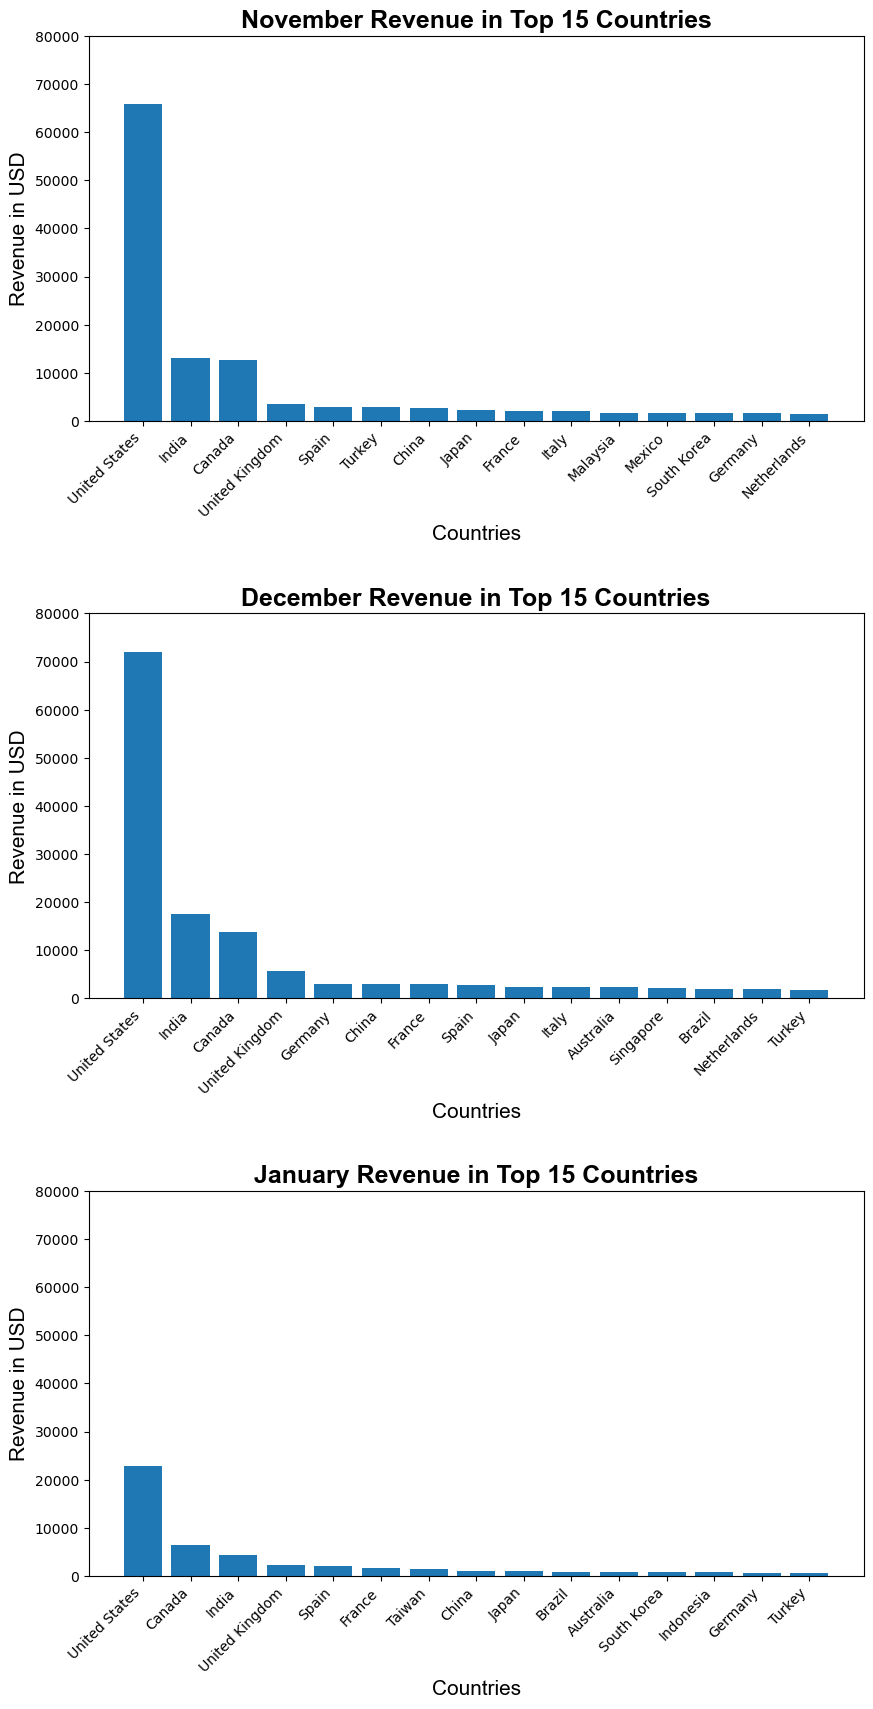

In [181]:
#Extract and name columns from dataframe columns
nov_countries = top_nov_revenue['country']
nov_revenue = top_nov_revenue['revenue']

dec_countries = top_dec_revenue['country']
dec_revenue = top_dec_revenue['revenue']

jan_countries = top_jan_revenue['country']
jan_revenue = top_jan_revenue['revenue']

#Create and show bar chart of events by country

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 20), sharey= True)

ax[0].plot = (nov_countries, nov_revenue)
ax[1].plot = (dec_countries, dec_revenue)
ax[2].plot = (jan_countries, jan_revenue)

ax[0].bar(nov_countries, nov_revenue)
ax[0].set_title('November Revenue in Top 15 Countries', fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': 'black', 'family': 'Arial'})
ax[0].set_ylabel('Revenue in USD', fontdict={'fontsize': 15, 'color': 'black', 'family': 'Arial'})
ax[0].set_xlabel('Countries', fontdict={'fontsize': 15, 'color': 'black', 'family': 'Arial'})
ax[0].set_xticks(nov_countries)
ax[0].set_xticklabels(nov_countries, rotation=45)

ax[1].bar(dec_countries, dec_revenue)
ax[1].set_title('December Revenue in Top 15 Countries', fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': 'black', 'family': 'Arial'})
ax[1].set_ylabel('Revenue in USD', fontdict={'fontsize': 15, 'color': 'black', 'family': 'Arial'})
ax[1].set_xlabel('Countries', fontdict={'fontsize': 15, 'color': 'black', 'family': 'Arial'})
ax[1].set_xticks(dec_countries)
ax[1].set_xticklabels(dec_countries, rotation=45)

ax[2].bar(jan_countries, jan_revenue)
ax[2].set_title('January Revenue in Top 15 Countries', fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': 'black', 'family': 'Arial'})
ax[2].set_ylabel('Revenue in USD', fontdict={'fontsize': 15, 'color': 'black', 'family': 'Arial'})
ax[2].set_xlabel('Countries', fontdict={'fontsize': 15, 'color': 'black', 'family': 'Arial'})
ax[2].set_xticks(jan_countries)
ax[2].set_xticklabels(jan_countries, rotation=45)

# Adjust x-tick labels to be right-aligned
for label in ax[0].get_xticklabels():
    label.set_horizontalalignment('right')
    
for label in ax[1].get_xticklabels():
    label.set_horizontalalignment('right')
    
for label in ax[2].get_xticklabels():
    label.set_horizontalalignment('right')
    
#Adjust y axis label limits
ax[0].set_ylim([0, 80000])

#For logarithmic scale
#plt.gca().set_yscale('log')

#Set space between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()
